In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters from Akash results.
ndrive = 1 # to iterate over
T1c = 546 # us storage cavity
wc = 6.011 * 10**3 # GHz frequency of storage cavity
wdp = np.arange(5.98, 6.04, 0.001) # It will be redefined, frequency array for dark photons
chi = 1.13 # 2pi MHz
T2echoQ = 61 # us (T2 instead of T2 echo)

n90 = 0.00242 # 2.42*10**(-3) prob of having a photon with 90% certainity in a measurement (N90/Nmeasured)). 
#Directly from the article. Compute this n90 implies some calculation. Prob acumulada de una binomial con p = N/Nmeasured, de la qeu se obtiene Eps90

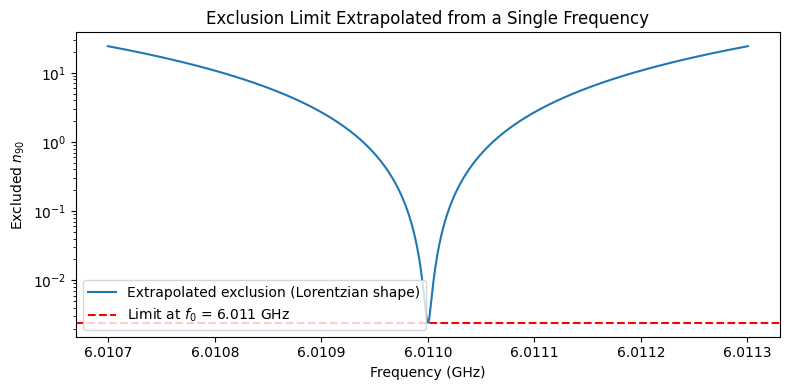

In [2]:
# Convolve the n90 computed limit for one frequency with the Lorentzian line shape expected for a Q = 10^6

# Parameters
f0 = 6.011        # GHz, central exclusion frequency
n0 = 0.00242      # exclusion limit at f0
Q = 1e6
gamma = f0 / Q    # Lorentzian FWHM ~6 kHz

# Frequency axis around f0 (±50 linewidths)
f = np.linspace(f0 - 50 * gamma, f0 + 50 * gamma, 1000)

# Exclusion curve: increases away from f0 due to line broadening
n90_lorentz = n0 * (1 + ((2 * (f - f0)) / gamma)**2)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(f, n90_lorentz, label='Extrapolated exclusion (Lorentzian shape)')
plt.axhline(n0, color='red', linestyle='--', label=f'Limit at $f_0$ = {f0} GHz')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Excluded $n_{90}$')
plt.title('Exclusion Limit Extrapolated from a Single Frequency')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()




In [3]:
wdp = 6.00
n_plus = ndrive * (np.pi/T1c)**2 / ((np.pi/T1c)**2 + (wc-wdp+chi)**2)
n_minus = ndrive * (np.pi/T1c)**2 /((np.pi/T1c)**2 + (wc-wdp-chi)**2)

D = 2*(n_plus + n_minus)*chi**2 / ((np.pi/T1c)**2 + chi**2 +(wc-wdp)**2)
#print(len(D))
Gm = D*np.pi/T1c
#print(len(Gm))
A = D * (np.pi/T1c - (chi)*1j - (wc-wdp)*1j) / (np.pi/T1c + (chi)*1j + (wc-wdp)*1j)
#print(len(A))

# Probablility of population of the odd number states of the cavity state. If it is bigger than the excluded hidden photon probability this signal is excluded.
k = [i for i in range(1, 6)] #Binomial parameter truncated
Podd = [1/np.pi * np.real(-A**(2*x+1)*np.exp(A)/(math.factorial(2*x+1)) / (2*(2*np.pi/T2echoQ + Gm) + (2*x+1)*2*np.pi/T1c) ) for x in k]
print(Podd)
print(np.sum(Podd))



[4.8503074422601874e-58, 3.7429299121382187e-97, 1.3859886724220537e-136, 3.0132490016052213e-176, 4.3117865061475794e-216]
4.8503074422601874e-58


2.4587436620140664e-19
2.5627913345996383e-19
2.671242035022966e-19
2.7842820879786596e-19
2.9021057029363567e-19
3.024915307803678e-19
3.1529218967090186e-19
3.2863453925015147e-19
3.425415024591084e-19
3.5703697227776427e-19
3.7214585277461506e-19
3.878941018932722e-19
4.0430877604968624e-19
4.2141807661661204e-19
4.392513983751704e-19
4.578393800167522e-19
4.772139567820287e-19
4.974084153275073e-19
5.184574509138911e-19
5.403972270145014e-19
5.632654374461686e-19
5.871013711293373e-19
6.119459795886519e-19
6.378419473099728e-19
6.648337650747384e-19
6.929678063976159e-19
7.222924071988162e-19
7.528579488479046e-19
7.8471694472181885e-19
8.179241304257916e-19
8.525365578321775e-19
8.886136930987508e-19
9.262175188348821e-19
9.654126405911096e-19
1.0062663978550656e-18
1.048848979744458e-18
1.0932335455958633e-18
1.1394963506565178e-18
1.1877168770950473e-18
1.2379779705562242e-18
1.2903659824943489e-18
1.344970918529803e-18
1.401886593083656e-18
1.461210790555982e-18
1.5230454333248

Text(0, 0.5, 'Podd')

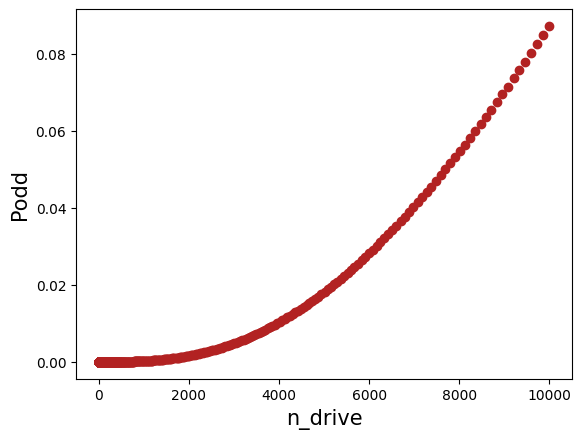

In [4]:
k = [i for i in range(1, 10)]
Ndrive = np.logspace(-2, 4, 1001)
wdp = wc

for ndrive in Ndrive:
    n_plus = ndrive * (np.pi/T1c)**2 / ((np.pi/T1c)**2 + (wc-wdp+chi)**2)
    n_minus = ndrive * (np.pi/T1c)**2 /((np.pi/T1c)**2 + (wc-wdp-chi)**2)
    D = 2*(n_plus + n_minus)*chi**2 / ((np.pi/T1c)**2 + chi**2 +(wc-wdp)**2)
    Gm = D*np.pi/T1c
    A = D * (np.pi/T1c - (chi)*1j - (wc-wdp)*1j) / (np.pi/T1c + (chi)*1j + (wc-wdp)*1j)
    # Sum over k to get Podd
    Podd_sum = np.sum([1/np.pi * np.real(-A**(2*x+1)*np.exp(A)/(math.factorial(2*x+1)) / (2*(2*np.pi/T2echoQ + Gm) + (2*x+1)*2*np.pi/T1c) ) for x in k])
    print(Podd_sum)
    plt.plot(ndrive,Podd_sum, 'o', color='firebrick')
plt.xlabel('n_drive', size=15)
plt.ylabel('Podd', size=15)

In [5]:
k = [i for i in range(1, 10)] # Binomial distribution truncation. No exactamente, no es una binomial.
wdp = np.arange(6.00* 10**3, 6.02* 10**3, 1) # Range of frequencies to prove
Ndrive = np.logspace(-4, 10, 1001) # Log distributed values for n_drive, intensity of the signal being checked.

pointsOver_list = []

# Loop over dark photon freq
for f in wdp:

    # Loop over n_drive 90%
    for ndrive in Ndrive:
        n_plus = ndrive * (np.pi/T1c)**2 / ((np.pi/T1c)**2 + (wc-f+chi)**2)
        n_minus = ndrive * (np.pi/T1c)**2 /((np.pi/T1c)**2 + (wc-f-chi)**2)
        D = 2*(n_plus + n_minus)*chi**2 / ((np.pi/T1c)**2 + chi**2 +(wc-f)**2)
        Gm = D*np.pi/T1c
        A = D * (np.pi/T1c - (chi)*1j - (wc-f)*1j) / (np.pi/T1c + (chi)*1j + (wc-f)*1j)

        # Sum over k to get Podd
        Podd_sum = np.sum([1/np.pi * np.real(-A**(2*x+1)*np.exp(A)/(math.factorial(2*x+1)) / (2*(2*np.pi/T2echoQ + Gm) + (2*x+1)*2*np.pi/T1c) ) for x in k])
        if Podd_sum >= n90:
            print(f, ndrive, Podd_sum)
            pointsOver_list.append([f, ndrive, Podd_sum])
            break
        
        

6000.0 20511621.788255624 0.0024318034182316288
6001.0 13931568.029453035 0.0024243899928689276
6002.0 9162204.901219992 0.0024813987729946146
6003.0 5649369.748123034 0.002455027726569603
6004.0 3265878.321723353 0.0024456725816853014
6005.0 1770108.9583174183 0.0026090816003194266
6006.0 816582.3713585939 0.0025261464836214037
6007.0 310455.9588128362 0.0024372475825282696
6008.0 85506.67128846841 0.002443601724109255
6009.0 10864.256236170644 0.002594012423568746
6010.0 111.68632477805612 0.002539453572033058
6011.0 2387.8112829131783 0.002590058741155697
6012.0 111.68632477805612 0.002466667076666096
6013.0 10864.256236170644 0.002592469468219164
6014.0 85506.67128846841 0.0024433294437946067
6015.0 310455.9588128362 0.002437147928371966
6016.0 816582.3713585939 0.002526096885400665
6017.0 1770108.9583174183 0.002609052976580723
6018.0 3265878.321723353 0.0024456559298189026
6019.0 5649369.748123034 0.002455016670705813


[[6000.0, 20511621.788255624, 0.0024318034182316288], [6001.0, 13931568.029453035, 0.0024243899928689276], [6002.0, 9162204.901219992, 0.0024813987729946146], [6003.0, 5649369.748123034, 0.002455027726569603], [6004.0, 3265878.321723353, 0.0024456725816853014], [6005.0, 1770108.9583174183, 0.0026090816003194266], [6006.0, 816582.3713585939, 0.0025261464836214037], [6007.0, 310455.9588128362, 0.0024372475825282696], [6008.0, 85506.67128846841, 0.002443601724109255], [6009.0, 10864.256236170644, 0.002594012423568746], [6010.0, 111.68632477805612, 0.002539453572033058], [6011.0, 2387.8112829131783, 0.002590058741155697], [6012.0, 111.68632477805612, 0.002466667076666096], [6013.0, 10864.256236170644, 0.002592469468219164], [6014.0, 85506.67128846841, 0.0024433294437946067], [6015.0, 310455.9588128362, 0.002437147928371966], [6016.0, 816582.3713585939, 0.002526096885400665], [6017.0, 1770108.9583174183, 0.002609052976580723], [6018.0, 3265878.321723353, 0.0024456559298189026], [6019.0, 564

Text(0, 0.5, 'n_drive ($\\propto \\epsilon$)')

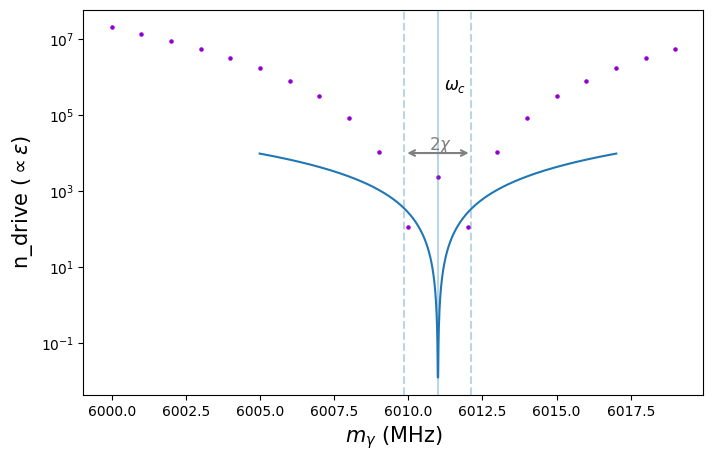

In [6]:
print(pointsOver_list)
print(len(pointsOver_list))
print(pointsOver_list[:][0])
x = [arr[0] for arr in pointsOver_list]
y = [arr[1] for arr in pointsOver_list]

plt.figure(figsize = (8,5))

plt.scatter(x,y, color= 'darkviolet', s=5)

plt.axvline(6011, alpha=0.3)
plt.axvline(6011-chi, linestyle='--', alpha=0.3)
plt.axvline(6011+chi, linestyle='--', alpha=0.3)
plt.text(6011+0.2, 10**6, r"$\omega_c$", fontsize=12, color="black", verticalalignment='top')
# Draw double-headed arrow 
plt.text(6011-0.3, 3*10**4, r"$2\chi$", fontsize=12, color="grey", verticalalignment='top')
plt.annotate("", xy=(6011-chi, 10**4), xytext=(6011+chi, 10**4),
             arrowprops=dict(arrowstyle="<->", color="grey", linewidth=1.5))

# Frequency axis around f0 (±50 linewidths)
f0 = 6.011
gamma = f0/10**6    # Lorentzian FWHM ~6 kHz
f = np.linspace(f0 - 1000 * gamma, f0 + 1000 * gamma, 1000)
n90_broad = n90 * (1 + ((2 * (f - f0)) / (f0/10**6))**2)
plt.plot(f*1000, n90_broad, label='Extrapolated exclusion (Lorentzian shape)')

plt.yscale('log')
plt.xlabel(r'$m_\gamma$ (MHz)', size=15)
plt.ylabel(r'n_drive ($\propto \epsilon$)', size=15)

Text(0, 0.5, 'n_drive ($\\propto \\epsilon$)')

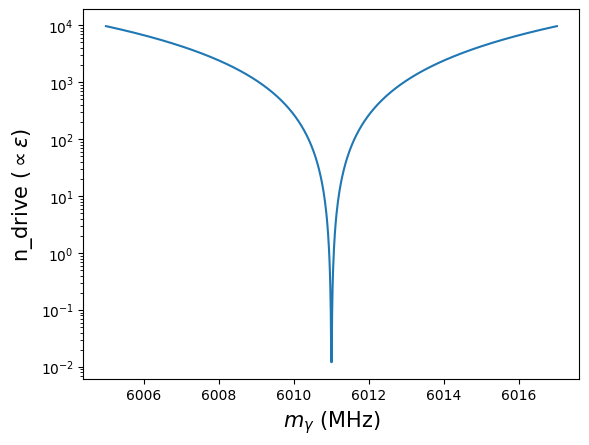

In [7]:
# Frequency axis around f0 (±1000 linewidths)
f0 = 6.011
gamma = f0/10**6    # Lorentzian FWHM ~6 kHz
f = np.linspace(f0 - 1000 * gamma, f0 + 1000 * gamma, 1000)
n90_broad = n90 * (1 + ((2 * (f - f0)) / (f0/10**6))**2)
plt.plot(f*1000, n90_broad, label='Extrapolated exclusion (Lorentzian shape)')
plt.yscale('log')
plt.xlabel(r'$m_\gamma$ (MHz)', size=15)
plt.ylabel(r'n_drive ($\propto \epsilon$)', size=15)

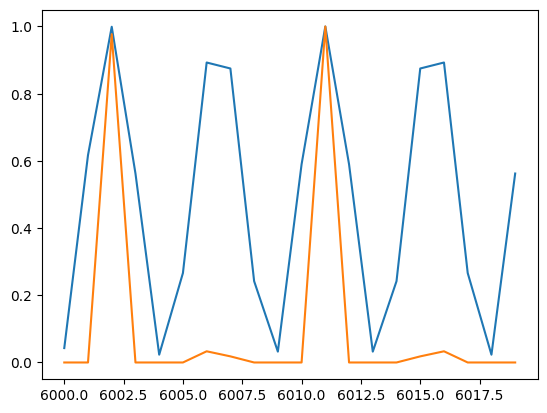

In [8]:
# Sine wave
#plt.plot(wdp, ((np.sin(2 * np.pi * chi * wdp) + 1)/2))
plt.plot(wdp, np.sin(np.pi * (2* chi + wc - wdp)/(2*2*chi ))**2)
plt.plot(wdp, np.sin(np.pi * (2* chi + wc - wdp)/(2*2*chi ))**60)


20
<class 'numpy.ndarray'>
20
<class 'list'>
20


(0.01, 10000000000)

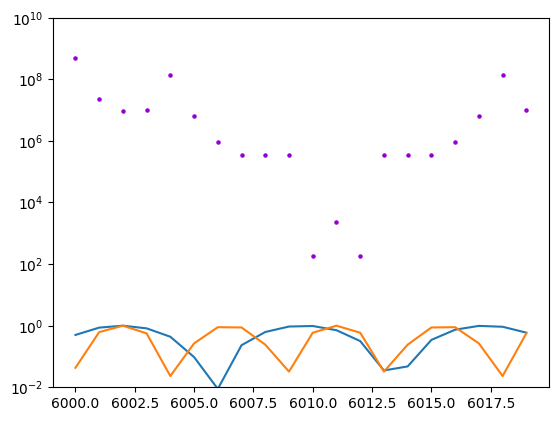

In [9]:
# Sine wave
plt.plot(wdp, ((np.sin(2 * np.pi * chi * wdp) + 1)/2))
plt.plot(wdp, np.sin(np.pi * (2* chi + wc - wdp)/(2*2*chi ))**2)
print(len(wdp))
print(type(wdp))
print(len(x))
print(type(x))
print(len(y))

plt.scatter(x,y/(np.sin(np.pi * (2* chi + wc - np.array(x))/(2*2*chi ))**2), color= 'darkviolet', s=5)
plt.scatter(wc,n90/(np.sin(np.pi * (2* chi + wc - wc)/(2*2*chi ))**2), color= 'firebrick', s=5)
plt.yscale('log')
plt.ylim(10**(-2), 10**10)

20
<class 'numpy.ndarray'>
20
<class 'list'>
20


(0.01, 1000000000000000)

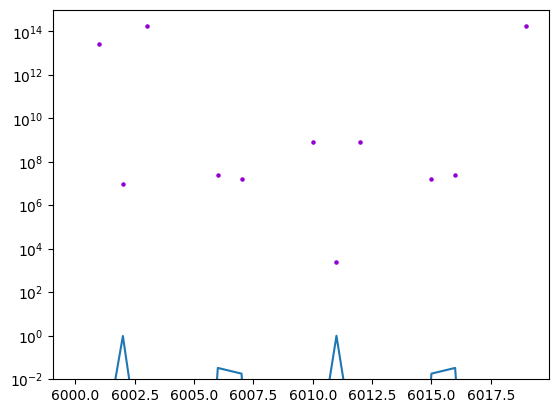

In [10]:
# Sine wave
#plt.plot(wdp, ((np.sin(2 * np.pi * chi * wdp) + 1)/2))
plt.plot(wdp, (np.sin(np.pi * (2* chi + wc - wdp)/(2*2*chi ))**2)**30)
print(len(wdp))
print(type(wdp))
print(len(x))
print(type(x))
print(len(y))

plt.scatter(x,y/(np.sin(np.pi * (2* chi + wc - np.array(x))/(2*2*chi ))**60), color= 'darkviolet', s=5)
plt.yscale('log')
plt.ylim(10**(-2), 10**15)

In [11]:
# Compute the 90% limit

from scipy.stats import binom

def accumulated_probability(n, p, N):
    cumulative_prob = 0.0
    for k in range(N + 1):
        cumulative_prob += binom.pmf(k, n, p)
    return cumulative_prob

# Haloscope parameters
mixAng = 2 * 1e-8
dens =  0.4 # GeV/cm^3
Qdm = 10e6
fs = 5.051 * 1e9 # Hz
T1s = 20 * 1e-6 # s
Qs = T1s * 2 * np.pi * fs
G = 1/3 * 2**6/np.pi**4
V = 45 * 40 * 5 * 1e-3 # cm^3
eff = 0.28
h = 6.626e-34


# Example usage:
n = 10000   # number of trials
p = eff * mixAng**2 * dens * Qdm * Qs * G * V / (2*np.pi*fs*h)  # probability of success
print (p)
N = 10   # sum up to N

print(dens * Qdm * Qs * G * V)
print('P(0) = ', binom.pmf(0, n, p))
print('P(1) = ',binom.pmf(1, n, p))
print('P(10) = ',binom.pmf(10, n, p))

accum_prob = accumulated_probability(n, p, N)
print(f"Accumulated probability up to N={N}: {accum_prob}")

2.665374976211675e+19
5004364812966.624
P(0) =  nan
P(1) =  nan
P(10) =  nan
Accumulated probability up to N=10: nan


acc < 0.1 at p_array[358]: index = 1.1401710360002105e-14, acc = 0.09931842713572
n90 =  0.003114353443411643


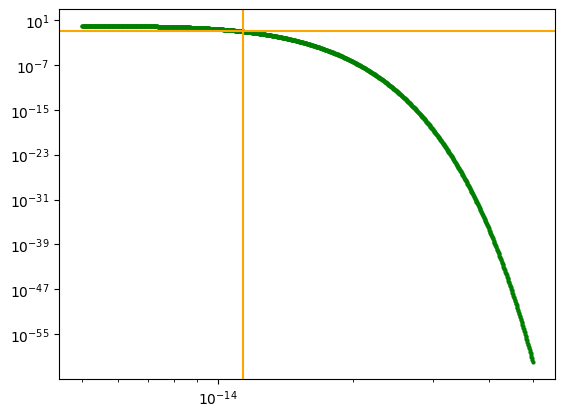

In [12]:
mixAng_array = 5*np.logspace(-15, -14, num=1001)
N = 4   # sum up to N Counts. Run 1 at 4e4 threshold is 4, for run 2 is 5.
n = 10000   # number of trials

# Haloscope parameters
dens =  0.4 * 1e9 # eV/cm^3
Qdm = 1e6
fs = 5.051 * 1e9 # Hz
T1s = 20 * 1e-6 # s
Qs = T1s * 2 * np.pi * fs
G = 1/3 * 2**6 / np.pi**4
V = 45 * 40 * 5 * 1e-3 # cm^3
eff = 0.257
h = 6.626e-34
densHz = dens * 2.418 * 1e14 # Hz/cm^3
#print(densHz)
# 1GeV≈2.418×10**14 GHz

p_array = []

for i in mixAng_array:
    #p = eff * i**2 * densHz * Qdm * Qs * G * V / (2*np.pi*fs)  # probability of success # With angular frequency
    p = eff * i**2 * densHz * Qdm * Qs * G * V / (fs)  # probability of success # With linear frequency
    acc = accumulated_probability(n, p, N)
    p_array.append([i, acc])
    plt.plot(i, acc, 'o', color='green', markersize = 2)

for i, (index, acc) in enumerate(p_array):
    if acc < 0.1:
        thres = index
        print(f"acc < 0.1 at p_array[{i}]: index = {index}, acc = {acc}")
        break

plt.xscale('log')
plt.yscale('log')
plt.axhline(0.1, color='orange')
plt.axvline(thres, color='orange')

#converted_n90 = eff * (thres)**2 * densHz * Qdm * Qs * G * V / (2*np.pi*fs) # With angular frequency
converted_n90 =  (thres)**2 * densHz * Qdm * Qs * G * V / (fs) # With linear frequency
print('n90 = ', converted_n90)

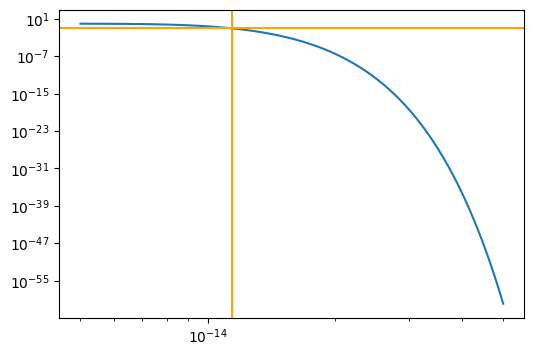

In [13]:
# Unzip into X and Y
x_vals, y_vals = zip(*p_array)

plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals)
plt.xscale('log')
plt.yscale('log')
plt.axhline(0.1, color='orange')
plt.axvline(thres, color='orange')

3.7768226881456495e-05


Text(0, 0.5, 'n_drive ($\\propto \\epsilon$)')

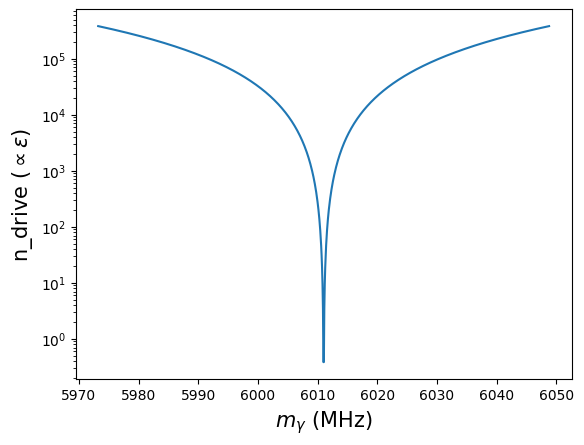

In [14]:
# Frequency axis around f0 (±50 linewidths)
# Broadening Akash
f0 = 6.011 
gamma = 2*np.pi*f0/10**6    # Lorentzian FWHM ~6 kHz
print(gamma)
f = np.linspace(f0 - 1000 * gamma, f0 + 1000 * gamma, 1000)
n90_broad = n90 * (1 + ((2 * (f - f0)) / (f0/10**6))**2)
plt.plot(f*1000, n90_broad, label='Extrapolated exclusion (Lorentzian shape)')
plt.yscale('log')
plt.xlabel(r'$m_\gamma$ (MHz)', size=15)
plt.ylabel(r'n_drive ($\propto \epsilon$)', size=15)

n90 =  0.003114353443411643
Qs:  634727.3797312818
Gamma:  50000.0
n90_Akash =  0.00242
QA:  20621451.877275243
GammaA:  1831.5018315018315


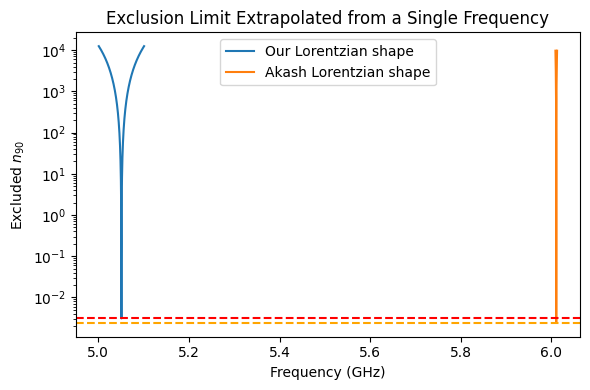

In [15]:
# Convolve the n90 computed limit for one frequency with the Lorentzian line shape expected for a Q = 10^6

# Parameters
print('n90 = ', converted_n90)
fs = 5.051 * 1e9 # Hz
T1s = 20 * 1e-6 # s
Qs = T1s * 2 * np.pi * fs
print('Qs: ', Qs)
gamma = 1/T1s   # Lorentzian FWHM ~6 kHz
gamma = 2*np.pi*fs/Qs
print('Gamma: ', gamma)

# Frequency axis around f0 (±50 linewidths)
f = np.linspace(fs - 1000 * gamma, fs + 1000 * gamma, 10001)

# Exclusion curve: increases away from f0 due to line broadening
n90_lorentz = converted_n90 * (1 + ((2 * (f - fs)) / gamma)**2)

# Akash
print('n90_Akash = ', n90)
f0A = 6.011 * 1e9 # Hz
T1A = 546 * 1e-6 # s
QA = T1A * 2 * np.pi * f0A
print('QA: ', QA)
gammaA = 2*np.pi*f0A/QA   # Lorentzian FWHM ~6 kHz
print('GammaA: ', gammaA)
fA = np.linspace(f0A - 1000 * gammaA, f0A + 1000 * gammaA, 10001)
#print(fA[0])
n90A = 0.00242
n90_broad = n90A * (1 + ((2 * (fA - f0A)) / gammaA)**2) 


# Plot
plt.figure(figsize=(6, 4))
plt.plot(f/1e9, n90_lorentz, label='Our Lorentzian shape')
plt.plot(fA/1e9, n90_broad, label='Akash Lorentzian shape')
plt.axhline(converted_n90, color='red', linestyle='--')
plt.axhline(n90A, color='orange', linestyle='--')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Excluded $n_{90}$')
plt.title('Exclusion Limit Extrapolated from a Single Frequency')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()




In [16]:
# Convert to mixing angle
# n90 = eff * (thres_90)**2 * densHz * Qdm * Qs * G * V / (2*np.pi*fs)
#eps90 = np.sqrt(converted_n90 * 2 * np.pi * fs / ( densHz * Qdm * Qs * G * V))
eps90 = np.sqrt(converted_n90  * fs / ( densHz * Qdm * Qs * G * V))

f0A = 6.011 * 1e9 # Hz
T1A = 546 * 1e-6 # s
QA = T1A * 2 * np.pi * f0A
GA = G
VA = 11.8 # cm^3
effA = 0.409
n90 = 0.00242

#epsA = np.sqrt(n90 * 2 * np.pi * f0A / (densHz * Qdm * QA * GA * VA)) # Why not this for angular frequency?
epsA = np.sqrt(n90  * f0A / (densHz * Qdm * QA * GA * VA)) # Akash value was extracted like this 

print('Our mixing angle: ', eps90)
print('Akash mixing angle: ', epsA)

Our mixing angle:  1.1401710360002105e-14
Akash mixing angle:  1.679935724493576e-15


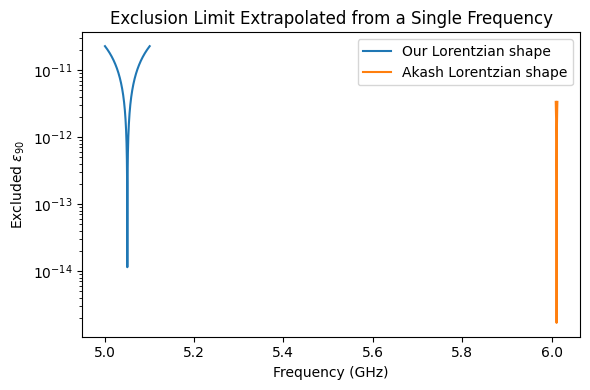

In [17]:
eps90_lorentz = np.sqrt(n90_lorentz  * fs / ( densHz * Qdm * Qs * G * V))
eps90A_broad = np.sqrt(n90_broad  * f0A / (densHz * Qdm * QA * GA * VA))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(f/1e9, eps90_lorentz, label='Our Lorentzian shape')
plt.plot(fA/1e9, eps90A_broad, label='Akash Lorentzian shape')
#plt.axhline(eps90, color='red', linestyle='--')
#plt.axhline(epsA, color='orange', linestyle='--')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Excluded $\epsilon_{90}$')
plt.title('Exclusion Limit Extrapolated from a Single Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

acc < 0.1 at p_array[394]: index = 1.2387110288166431e-14, acc = 0.0499116105234063
n95 =  0.003675935635971777


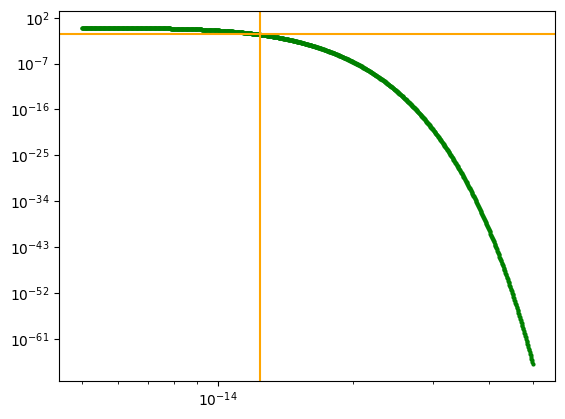

In [18]:
##### Dark matter density 0.45 instead of 0.4 and 95% confidence level
mixAng_array = 5*np.logspace(-15, -14, num=1001)
N = 5   # sum up to N
n = 10000   # number of trials

# Haloscope parameters
dens45 =  0.45 * 1e9 # eV/cm^3
Qdm = 1e6
fs = 5.051 * 1e9 # Hz
T1s = 20 * 1e-6 # s
Qs = T1s * 2 * np.pi * fs
G = 1/3 * 2**6 / np.pi**4
V = 45 * 40 * 5 * 1e-3 # cm^3
eff = 0.286
h = 6.626e-34
dens45Hz = dens * 2.418 * 1e14 # Hz/cm^3
#print(densHz)
# 1GeV≈2.418×10**14 GHz

p_array = []

for i in mixAng_array:
    #p = eff * i**2 * densHz * Qdm * Qs * G * V / (2*np.pi*fs)  # probability of success # With angular frequency
    p = eff * i**2 * dens45Hz * Qdm * Qs * G * V / (fs)  # probability of success # With linear frequency
    acc = accumulated_probability(n, p, N)
    p_array.append([i, acc])
    plt.plot(i, acc, 'o', color='green', markersize = 2)

for i, (index, acc) in enumerate(p_array):
    if acc < 0.05:
        thres = index
        print(f"acc < 0.1 at p_array[{i}]: index = {index}, acc = {acc}")
        break

plt.xscale('log')
plt.yscale('log')
plt.axhline(0.05, color='orange')
plt.axvline(thres, color='orange')

#converted_n95 = eff * (thres)**2 * densHz * Qdm * Qs * G * V / (2*np.pi*fs) # With angular frequency
converted_n95 =  (thres)**2 * dens45Hz * Qdm * Qs * G * V / (fs) # With linear frequency
print('n95 = ', converted_n95)

Text(1.25e-14, 5e-09, '')

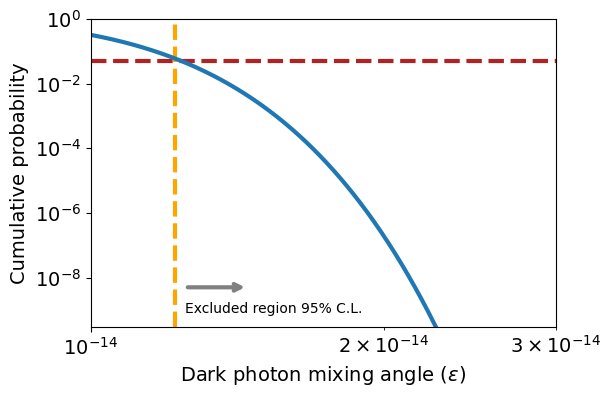

In [19]:
# Unzip into X and Y
x_vals, y_vals = zip(*p_array)

plt.figure(figsize=(6,4))

plt.axhline(0.05, color='firebrick', linestyle='--', lw=3)
plt.axvline(1.2217e-14, color='orange', linestyle='--', lw=3)
plt.plot(x_vals, y_vals, lw=3)
plt.xlim(1e-14, 3e-14)
plt.ylim(3e-10, 1e0,)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='both', labelsize=14)
plt.xlabel(r'Dark photon mixing angle ($\varepsilon$)', size = 14)
plt.ylabel('Cumulative probability', size = 14)
plt.text(1.25e-14, 0.0000000008, "Excluded region 95% C.L.", size = 10)



plt.annotate(
    "",         # Text to display
    xy=(1.45e-14, 0.000000005),             # Point to annotate (arrow tip)
    xytext=(1.25e-14, 0.000000005),       # Position of the text
    arrowprops=dict(arrowstyle="->", color='grey', lw=3),
    fontsize=12,
    color='blue'
)

n95 =  0.003675935635971777


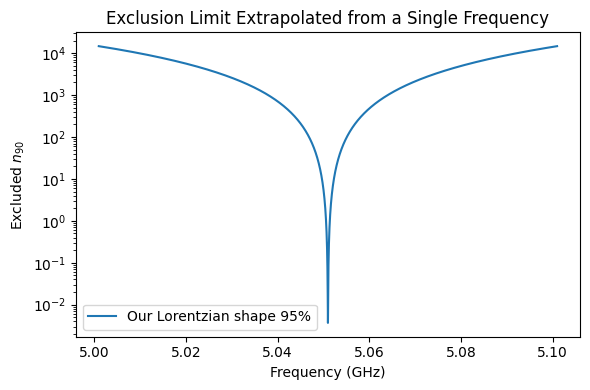

In [20]:
# Parameters
print('n95 = ', converted_n95)
fs = 5.051 * 1e9 # Hz
T1s = 20 * 1e-6 # s
Qs = T1s * 2 * np.pi * fs
gamma = 2*np.pi*fs/Qs
#print('Qs: ', Qs)
#print('Gamma: ', gamma)

# Frequency axis around f0 (±50 linewidths)
f = np.linspace(fs - 1000 * gamma, fs + 1000 * gamma, 10001)

# Exclusion curve: increases away from fs due to line broadening
n95_lorentz = converted_n95 * (1 + ((2 * (f - fs)) / gamma)**2)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(f/1e9, n95_lorentz, label='Our Lorentzian shape 95%')
#plt.axhline(converted_n95, color='red', linestyle='--')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Excluded $n_{90}$')
plt.title('Exclusion Limit Extrapolated from a Single Frequency')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()


Frequency =  5.051
Mass = 2.0889257532496e-05
Epsilon 95 =  1.2387110288166433e-14
Ocupation n95 =  0.003675935635971777


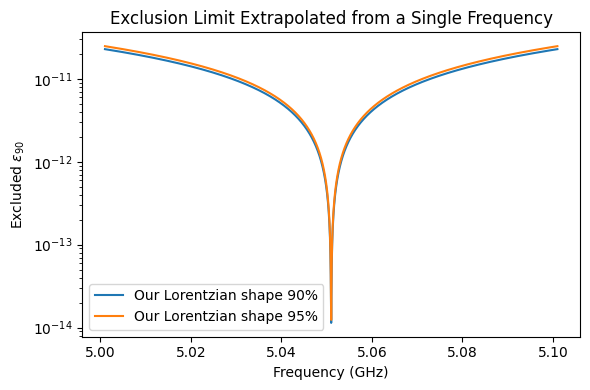

In [21]:
eps95_lorentz = np.sqrt(n95_lorentz  * fs / ( dens45Hz * Qdm * Qs * G * V))
eps90A_broad = np.sqrt(n90_broad  * f0A / (densHz * Qdm * QA * GA * VA))

print('Frequency = ', fs/1e9)
print('Mass =', 4.135667696e-6 * fs/1e9)
print('Epsilon 95 = ', np.sqrt(converted_n95  * fs / ( dens45Hz * Qdm * Qs * G * V)))
print('Ocupation n95 = ', (thres)**2 * dens45Hz * Qdm * Qs * G * V / (fs) )

# Plot
plt.figure(figsize=(6, 4))
plt.plot(f/1e9, eps90_lorentz, label='Our Lorentzian shape 90%')
plt.plot(f/1e9, eps95_lorentz, label='Our Lorentzian shape 95%')

#plt.plot(fA/1e9, eps90A_broad, label='Akash Lorentzian shape')
#plt.axhline(eps90, color='red', linestyle='--')
#plt.axhline(epsA, color='orange', linestyle='--')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Excluded $\epsilon_{90}$')
plt.title('Exclusion Limit Extrapolated from a Single Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

save = False
if save == True:
    # Stack into two columns and save
    h_GHz_to_eV = 4.135667696e-6  # eV/GHz
    data = np.column_stack((h_GHz_to_eV* f/1e9, eps95_lorentz))
    np.savetxt('exclusion_limit_SPC_95_massDP.txt', data, header='Mass_eV Epsilon', fmt='%.6e', comments='')

acc_comb < 0.05 at p_array[320]: index = 1.0446480654270203e-14, acc = 0.048797454861150495
n95 =  0.0026143750996229734


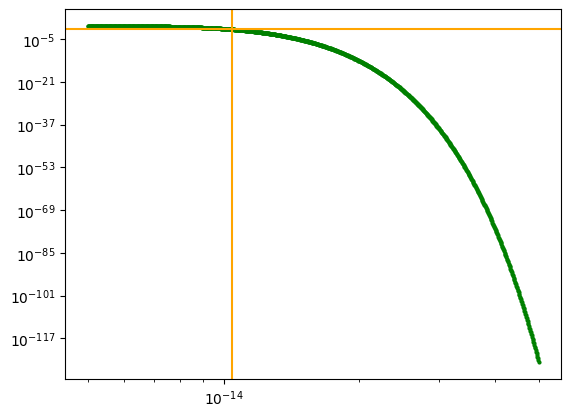

In [22]:
#### Combine two runs #####

# Dark matter density 0.45 and 95% confidence level
# Mixing angle array
mixAng_array = 5*np.logspace(-15, -14, num=1001)
#N = 4   # sum up to N
n = 10000   # number of trials

# Run 1
N1 = 4
eff1 = 0.257

# Run 2
N2 = 5
eff2 = 0.286

# Haloscope and axion parameters
dens45 =  0.45 * 1e9 # eV/cm^3
Qdm = 1e6
fs = 5.051 * 1e9 # Hz
T1s = 20 * 1e-6 # s
Qs = T1s * 2 * np.pi * fs
G = 1/3 * 2**6 / np.pi**4
V = 45 * 40 * 5 * 1e-3 # cm^3
#eff = 0.257
h = 6.626e-34
dens45Hz = dens * 2.418 * 1e14 # Hz/cm^3
#print(densHz)
# 1GeV≈2.418×10**14 GHz

p_array = []

for i in mixAng_array:
    p1 = eff1 * i**2 * dens45Hz * Qdm * Qs * G * V / (fs)  # probability of success # With linear frequency
    acc1 = accumulated_probability(n, p1, N1)
    p2 = eff2 * i**2 * dens45Hz * Qdm * Qs * G * V / (fs)  # probability of success # With linear frequency
    acc2 = accumulated_probability(n, p2, N2)
    P_combined = acc1*acc2  # P_combined ​= P1 x P2​  if independent
    p_array.append([i, P_combined]) 
    plt.plot(i, P_combined, 'o', color='green', markersize = 2)

for i, (index, acc_comb) in enumerate(p_array):
    if acc_comb < 0.05:
        thres = index
        print(f"acc_comb < 0.05 at p_array[{i}]: index = {index}, acc = {acc_comb}")
        break

plt.xscale('log')
plt.yscale('log')
plt.axhline(0.05, color='orange')
plt.axvline(thres, color='orange')

#converted_n95 = eff * (thres)**2 * densHz * Qdm * Qs * G * V / (2*np.pi*fs) # With angular frequency
convertedComb_n95 =  (thres)**2 * dens45Hz * Qdm * Qs * G * V / (fs) # With linear frequency
print('n95 = ', convertedComb_n95)

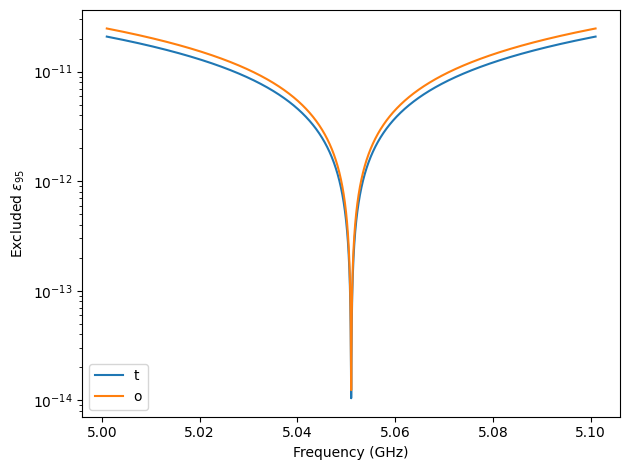

In [23]:
# Frequency axis around f0 (±50 linewidths)
f = np.linspace(fs - 1000 * gamma, fs + 1000 * gamma, 10001)

# Exclusion curve: increases away from fs due to line broadening
n95_Comb_lorentz = convertedComb_n95 * (1 + ((2 * (f - fs)) / gamma)**2) # Lorentzian in n
eps95_combinedLor = np.sqrt(n95_Comb_lorentz  * fs / ( dens45Hz * Qdm * Qs * G * V)) # Lorentzian in epsilon


plt.plot(f/1e9, eps95_combinedLor, label='Runs 1 + 2 Lorentzian 95% CL')
plt.plot(f/1e9, eps95_lorentz, label='Run 1 Lorentzian 95% CL')

#plt.plot(fA/1e9, eps90A_broad, label='Akash Lorentzian shape')
#plt.axhline(eps90, color='red', linestyle='--')
#plt.axhline(epsA, color='orange', linestyle='--')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Excluded $\epsilon_{95}$')
#plt.title('Exclusion Limit Extrapolated from a Single Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.legend('top')
plt.tight_layout()
plt.show()

save = False
if save == True:
    # Stack into two columns and save
    h_GHz_to_eV = 4.135667696e-6  # eV/GHz
    data = np.column_stack((h_GHz_to_eV* f/1e9, eps95_lorentz))
    np.savetxt('exclusion_limit_SPC_95_massDP.txt', data, header='Mass_eV Epsilon', fmt='%.6e', comments='')